In [42]:
#Import Libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from scipy.stats import mode

/home/aditya1234/.local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [43]:
df=pd.read_csv("kid.csv")
#reading the data

In [44]:
df.head(10)
#SHOWING TOP 10 ROWS

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44.0,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38.0,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31.0,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32.0,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35.0,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,0.0,0.0,...,39.0,7800,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1
6,6,68.0,70.0,1.010,0.0,0.0,NaN,1.0,0.0,0.0,...,36.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
7,7,24.0,NaN,1.015,2.0,4.0,1.0,0.0,0.0,0.0,...,44.0,6900,5,0.0,1.0,0.0,1.0,1.0,0.0,1
8,8,52.0,100.0,1.015,3.0,0.0,1.0,0.0,1.0,0.0,...,33.0,9600,4,1.0,1.0,0.0,1.0,0.0,1.0,1
9,9,53.0,90.0,1.020,2.0,0.0,0.0,0.0,1.0,0.0,...,29.0,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1


In [45]:
df.tail(10)
#showing last 10 rows

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
390,390,52.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,52.0,6300,5.3,0.0,0.0,0.0,1.0,0.0,0.0,0
391,391,36.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,44.0,5800,6.3,0.0,0.0,0.0,1.0,0.0,0.0,0
392,392,57.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,46.0,6600,5.5,0.0,0.0,0.0,1.0,0.0,0.0,0
393,393,43.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,54.0,7400,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
394,394,50.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,45.0,9500,4.6,0.0,0.0,0.0,1.0,0.0,0.0,0
395,395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,47.0,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,54.0,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,49.0,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,51.0,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0
399,399,58.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,53.0,6800,6.1,0.0,0.0,0.0,1.0,0.0,0.0,0


In [46]:
df.isnull().sum()

id                         0
age                        9
bloodpressure             12
specificgravity           47
albumin                   46
sugar                     49
redbloodcells            152
puscell                   65
puscellclumps              4
bacteria                   4
bloodglucoserandom        44
bloodurea                 19
serumcreatinine           17
sodium                    87
potassium                 88
haemoglobin               52
packedcellvolume          71
whitebloodcellcount      105
redbloodcellcount        130
hypertension               2
diabetesmellitus           2
coronaryarterydisease      2
appetite                   1
pedaledema                 1
anemia                     1
classification             0
dtype: int64

We Can see that there are some NaN values in the dataset.
So we have to remove that.
For that we are using backward fillna method.

In [47]:
df=df.bfill(axis ='rows') 

In [48]:
df.describe()

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,potassium,haemoglobin,packedcellvolume,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.00000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.580000,76.35000,1.017175,1.072500,0.495000,0.750000,0.762500,0.105000,0.055000,...,4.569000,12.388500,38.12750,0.367500,0.34250,0.085000,0.795000,0.190000,0.150000,0.625000
std,115.614301,17.101455,13.73496,0.005699,1.377311,1.130562,0.433555,0.426084,0.306937,0.228266,...,2.846858,2.865265,8.98209,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,0.000000,2.000000,50.00000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.500000,3.100000,9.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.00000,1.010000,0.000000,0.000000,0.750000,1.000000,0.000000,0.000000,...,3.800000,10.400000,32.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,80.00000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,4.400000,12.500000,39.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,299.250000,65.000000,80.00000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,4.900000,14.800000,44.25000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.00000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,47.000000,17.800000,54.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.head()

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,...,44.0,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,...,38.0,6000,3.9,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31.0,7500,3.9,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32.0,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35.0,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [9]:
df[30:80]

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
30,30,73.0,70.0,1.015,3.0,0.0,0.0,0.0,0.0,0.0,...,30.0,7800,4,1.0,1.0,0.0,1.0,0.0,0.0,1
31,31,73.0,90.0,1.015,3.0,0.0,0.0,0.0,1.0,0.0,...,30.0,7800,4,0.0,0.0,0.0,0.0,0.0,0.0,1
32,32,61.0,90.0,1.010,1.0,1.0,0.0,1.0,0.0,0.0,...,34.0,9600,4,1.0,1.0,0.0,0.0,0.0,0.0,1
33,33,60.0,100.0,1.020,2.0,0.0,0.0,0.0,0.0,0.0,...,29.0,9800,4.9,1.0,0.0,0.0,0.0,0.0,0.0,1
34,34,70.0,70.0,1.010,1.0,0.0,1.0,1.0,1.0,1.0,...,36.0,9800,4.9,0.0,1.0,0.0,0.0,0.0,0.0,1
35,35,65.0,90.0,1.020,2.0,1.0,0.0,1.0,0.0,0.0,...,36.0,9800,4.9,1.0,1.0,0.0,0.0,0.0,1.0,1
36,36,76.0,70.0,1.015,1.0,0.0,1.0,1.0,0.0,0.0,...,32.0,6900,2.5,1.0,0.0,0.0,1.0,0.0,0.0,1
37,37,72.0,80.0,1.020,3.0,0.0,0.0,1.0,0.0,0.0,...,28.0,6900,2.5,1.0,1.0,0.0,0.0,0.0,1.0,1
38,38,69.0,80.0,1.020,3.0,0.0,0.0,1.0,0.0,0.0,...,40.0,9800,4.2,1.0,0.0,0.0,1.0,0.0,0.0,1
39,39,82.0,80.0,1.010,2.0,2.0,1.0,0.0,0.0,0.0,...,40.0,9800,4.2,1.0,1.0,0.0,1.0,0.0,0.0,1


In [10]:
df.isnull().sum()

id                       0
age                      0
bloodpressure            0
specificgravity          0
albumin                  0
sugar                    0
redbloodcells            0
puscell                  0
puscellclumps            0
bacteria                 0
bloodglucoserandom       0
bloodurea                0
serumcreatinine          0
sodium                   0
potassium                0
haemoglobin              0
packedcellvolume         0
whitebloodcellcount      0
redbloodcellcount        0
hypertension             0
diabetesmellitus         0
coronaryarterydisease    0
appetite                 0
pedaledema               0
anemia                   0
classification           0
dtype: int64

In [11]:
df.dtypes

id                         int64
age                      float64
bloodpressure            float64
specificgravity          float64
albumin                  float64
sugar                    float64
redbloodcells            float64
puscell                  float64
puscellclumps            float64
bacteria                 float64
bloodglucoserandom       float64
bloodurea                float64
serumcreatinine          float64
sodium                   float64
potassium                float64
haemoglobin              float64
packedcellvolume         float64
whitebloodcellcount       object
redbloodcellcount         object
hypertension             float64
diabetesmellitus         float64
coronaryarterydisease    float64
appetite                 float64
pedaledema               float64
anemia                   float64
classification             int64
dtype: object

We can see that the the NaN values have been countered .But in the dataypes,there are 2 columns(whitebloodcellcount,redbloodcellcount) which are of the type objects.
We have to counter them as well.

In [49]:

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])


In [50]:
df.dtypes

id                         int64
age                      float64
bloodpressure            float64
specificgravity          float64
albumin                  float64
sugar                    float64
redbloodcells            float64
puscell                  float64
puscellclumps            float64
bacteria                 float64
bloodglucoserandom       float64
bloodurea                float64
serumcreatinine          float64
sodium                   float64
potassium                float64
haemoglobin              float64
packedcellvolume         float64
whitebloodcellcount        int64
redbloodcellcount          int64
hypertension             float64
diabetesmellitus         float64
coronaryarterydisease    float64
appetite                 float64
pedaledema               float64
anemia                   float64
classification             int64
dtype: object

In [51]:
df.describe()

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.00000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.580000,76.35000,1.017175,1.072500,0.495000,0.750000,0.762500,0.105000,0.055000,...,38.12750,52.947500,24.207500,0.367500,0.34250,0.085000,0.795000,0.190000,0.150000,0.625000
std,115.614301,17.101455,13.73496,0.005699,1.377311,1.130562,0.433555,0.426084,0.306937,0.228266,...,8.98209,27.134396,9.925509,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,0.000000,2.000000,50.00000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.00000,1.010000,0.000000,0.000000,0.750000,1.000000,0.000000,0.000000,...,32.00000,32.750000,17.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,80.00000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,39.00000,60.000000,24.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,299.250000,65.000000,80.00000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,44.25000,74.000000,31.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.00000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,54.00000,91.000000,45.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


So now this is our final dataset(df1) after pre-processing.
So this data can be carried out to buld our model and mke predictions 


Let us normalise the data,

In [52]:
a=df.max()
a
#Maximum Values of each attribute are being displayed

id                       399.000
age                       90.000
bloodpressure            180.000
specificgravity            1.025
albumin                    5.000
sugar                      5.000
redbloodcells              1.000
puscell                    1.000
puscellclumps              1.000
bacteria                   1.000
bloodglucoserandom       490.000
bloodurea                391.000
serumcreatinine           76.000
sodium                   163.000
potassium                 47.000
haemoglobin               17.800
packedcellvolume          54.000
whitebloodcellcount       91.000
redbloodcellcount         45.000
hypertension               1.000
diabetesmellitus           1.000
coronaryarterydisease      1.000
appetite                   1.000
pedaledema                 1.000
anemia                     1.000
classification             1.000
dtype: float64

In [53]:
b=df.min()
b
#minimum values of each attribute are displayed

id                        0.000
age                       2.000
bloodpressure            50.000
specificgravity           1.005
albumin                   0.000
sugar                     0.000
redbloodcells             0.000
puscell                   0.000
puscellclumps             0.000
bacteria                  0.000
bloodglucoserandom       22.000
bloodurea                 1.500
serumcreatinine           0.400
sodium                    4.500
potassium                 2.500
haemoglobin               3.100
packedcellvolume          9.000
whitebloodcellcount       0.000
redbloodcellcount         0.000
hypertension              0.000
diabetesmellitus          0.000
coronaryarterydisease     0.000
appetite                  0.000
pedaledema                0.000
anemia                    0.000
classification            0.000
dtype: float64

In [54]:
#normalised data
n=(df-b)/(a-b)
n

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
0,0.000000,0.522727,0.230769,0.75,0.2,0.0,1.0,1.0,0.0,0.0,...,0.777778,0.791209,0.688889,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.002506,0.056818,0.000000,0.75,0.8,0.0,1.0,1.0,0.0,0.0,...,0.644444,0.615385,0.400000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.005013,0.681818,0.230769,0.25,0.4,0.6,1.0,1.0,0.0,0.0,...,0.488889,0.769231,0.400000,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.007519,0.522727,0.153846,0.00,0.8,0.0,1.0,0.0,1.0,0.0,...,0.511111,0.681319,0.400000,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.010025,0.556818,0.230769,0.25,0.4,0.0,1.0,1.0,0.0,0.0,...,0.577778,0.747253,0.555556,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.012531,0.659091,0.307692,0.50,0.6,0.0,1.0,1.0,0.0,0.0,...,0.666667,0.791209,0.511111,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,0.015038,0.750000,0.153846,0.25,0.0,0.0,1.0,1.0,0.0,0.0,...,0.600000,0.703297,0.644444,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,0.017544,0.250000,0.384615,0.50,0.4,0.8,1.0,0.0,0.0,0.0,...,0.777778,0.703297,0.644444,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,0.020050,0.568182,0.384615,0.50,0.6,0.0,1.0,0.0,1.0,0.0,...,0.533333,0.967033,0.422222,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,0.022556,0.579545,0.307692,0.75,0.4,0.0,0.0,0.0,1.0,0.0,...,0.444444,0.197802,0.355556,1.0,1.0,0.0,0.0,0.0,1.0,1.0


DATA VISUALISATION

Let us visualise the data by plotting various Graphs and charts

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

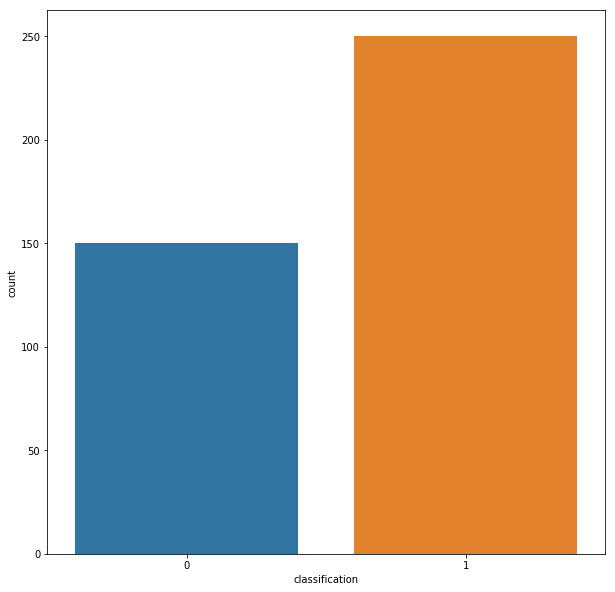

In [56]:
plt.figure(figsize=(10, 10))
sns.countplot(x ='classification', data = df)
plt.show()

We can see that there are 250 out 400 kidney patients in our dataset

Let us find the number of Diabetic patients in our dataset

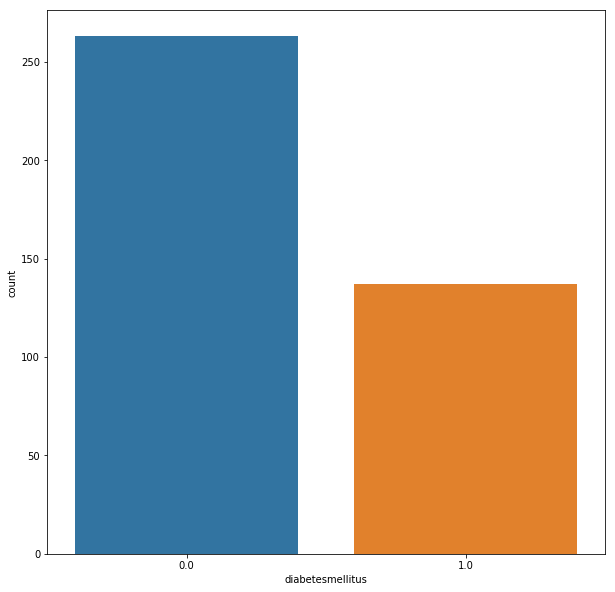

In [57]:

plt.figure(figsize=(10, 10))
sns.countplot(x ='diabetesmellitus', data = df)
plt.show()

We can observe that 140 people are diabetic

Let us find the number of heart patients in our dataset

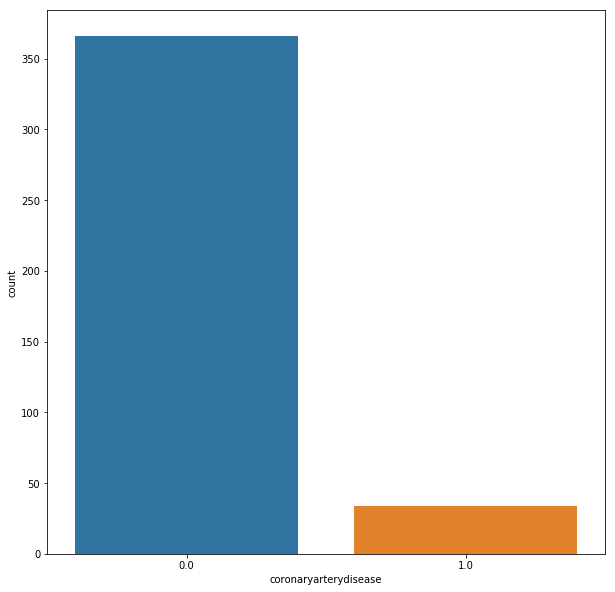

In [58]:

plt.figure(figsize=(10, 10))
sns.countplot(x ='coronaryarterydisease', data = df)
plt.show()

We can observe that there are 30 heart patients in our dataset 

Let us Visualise Blood Pressure in our dataset

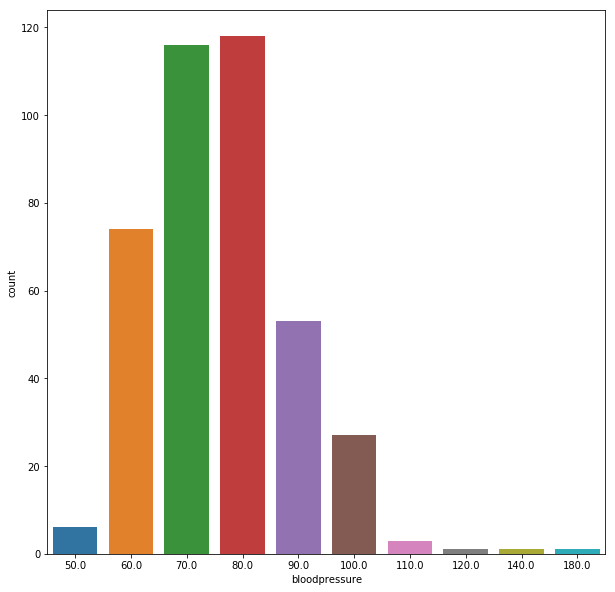

In [59]:
plt.figure(figsize=(10, 10))
sns.countplot(x ='bloodpressure', data = df)
plt.show()

Now Let us Visualise age vs CKD In terms of hue graph

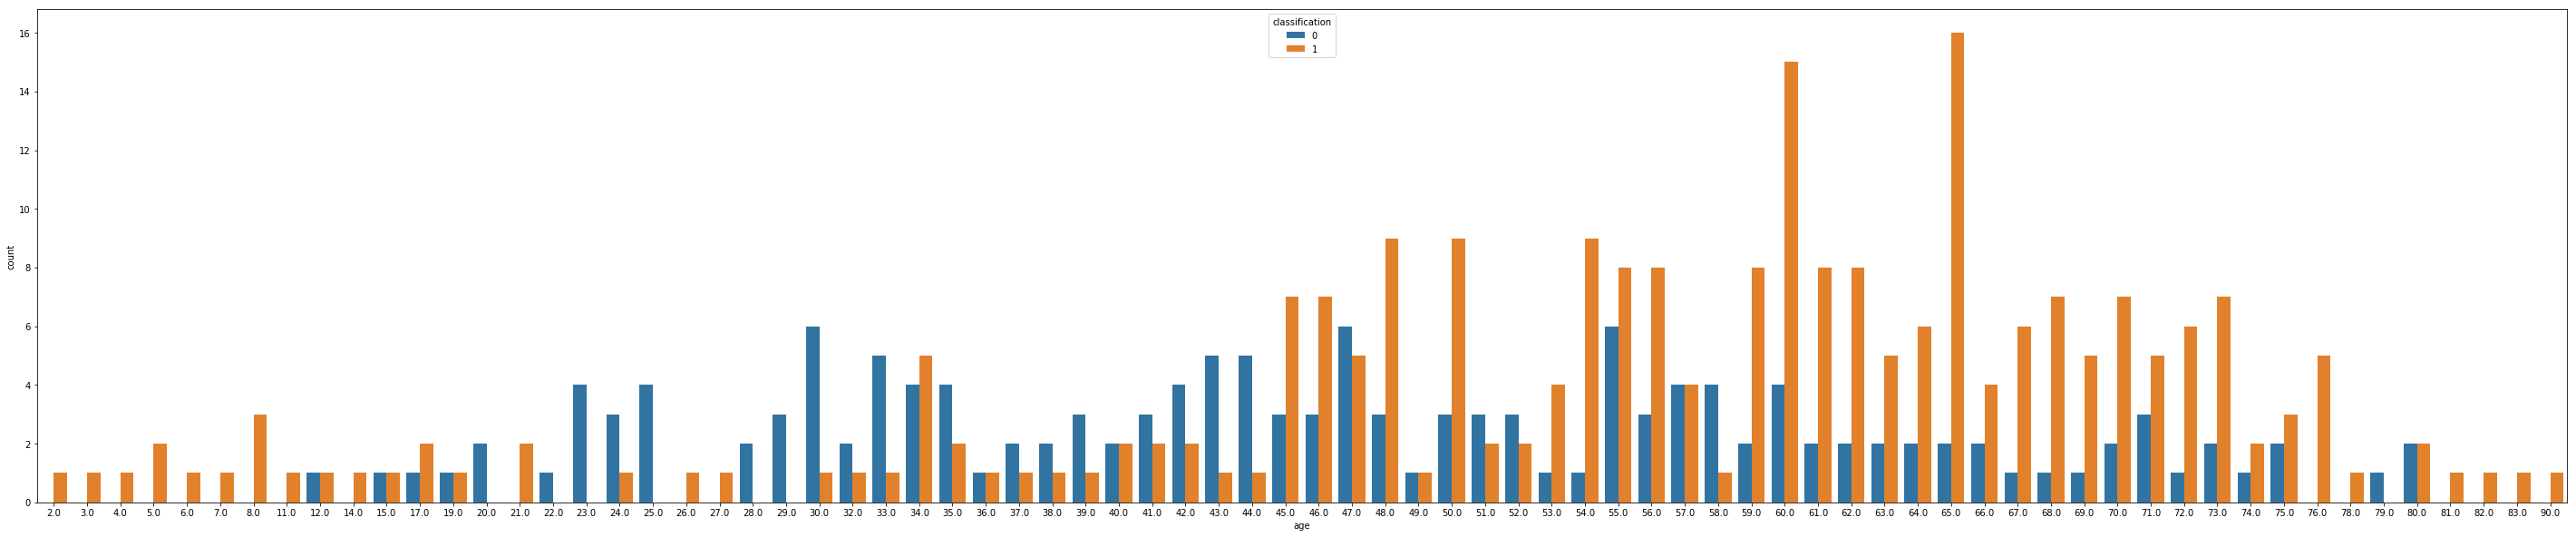

In [60]:
plt.figure(figsize=(50, 10))
sns.countplot(x ='age', data = df,hue='classification')
plt.show()

Now Let us Visualise blood pressure vs CKD In terms of hue graph

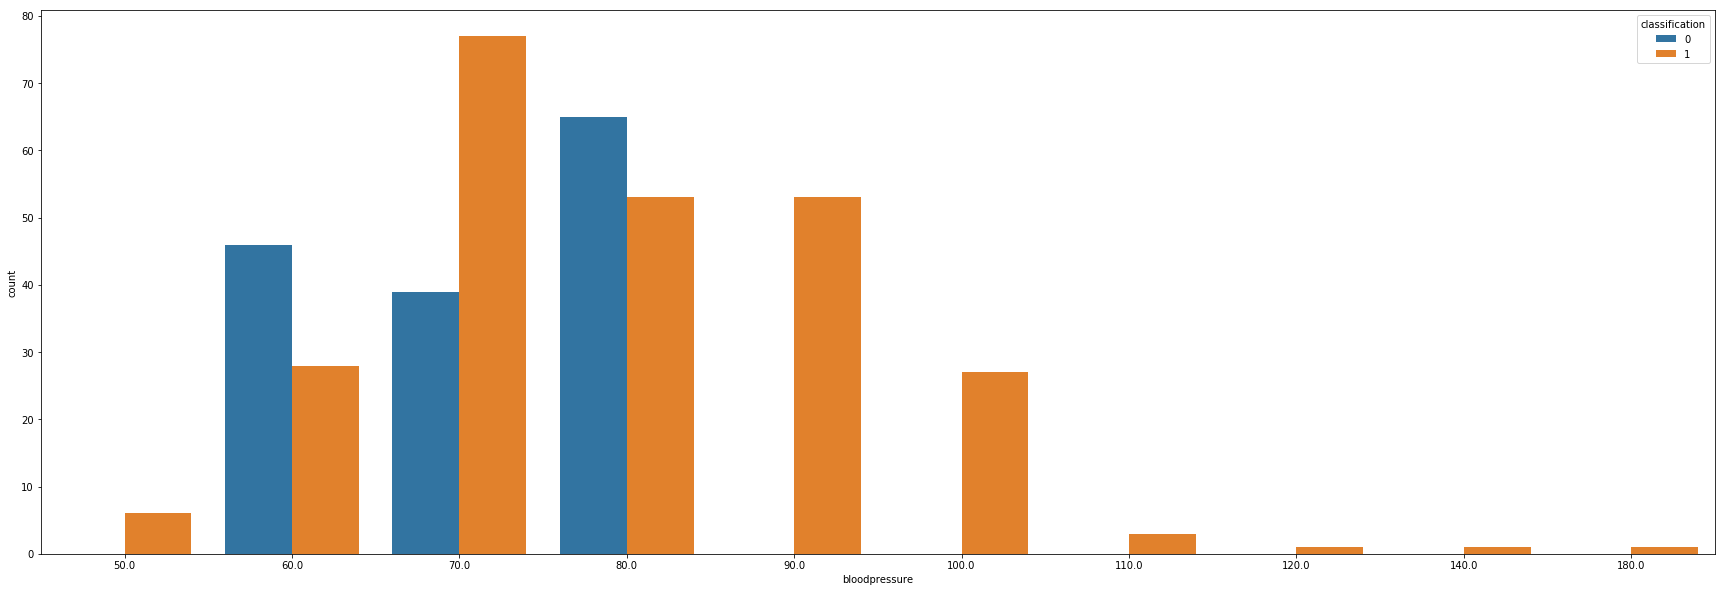

In [61]:
plt.figure(figsize=(30, 10))
sns.countplot(x ='bloodpressure', data = df,hue='classification')
plt.show()

Numerical data is a type of data that is expressed in terms of numbers rather than natural language descriptions. Similar to its name, numerical, it can only be collected in number form. Also known as quantitative data, this numerical data type can be used as a form of measurement, such as a person’s height, weight, IQ, etc.

Categorical data is a type of data that is used to group information with similar characteristics while Numerical data is a type of data that expresses information in the form of numbers. It combines numeric values to depict relevant information while categorical data uses a descriptive approach to express information

In [62]:
numericalFeatures = []
categoricalFeatures = []

In [63]:
for i in df.columns:
    if df[i].nunique()>=9:
        numericalFeatures.append(i)
    else:
        categoricalFeatures.append(i)

 DISTRIBUTION OF NUMERICAL FEATURES

/home/aditya1234/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/aditya1234/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/aditya1234/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

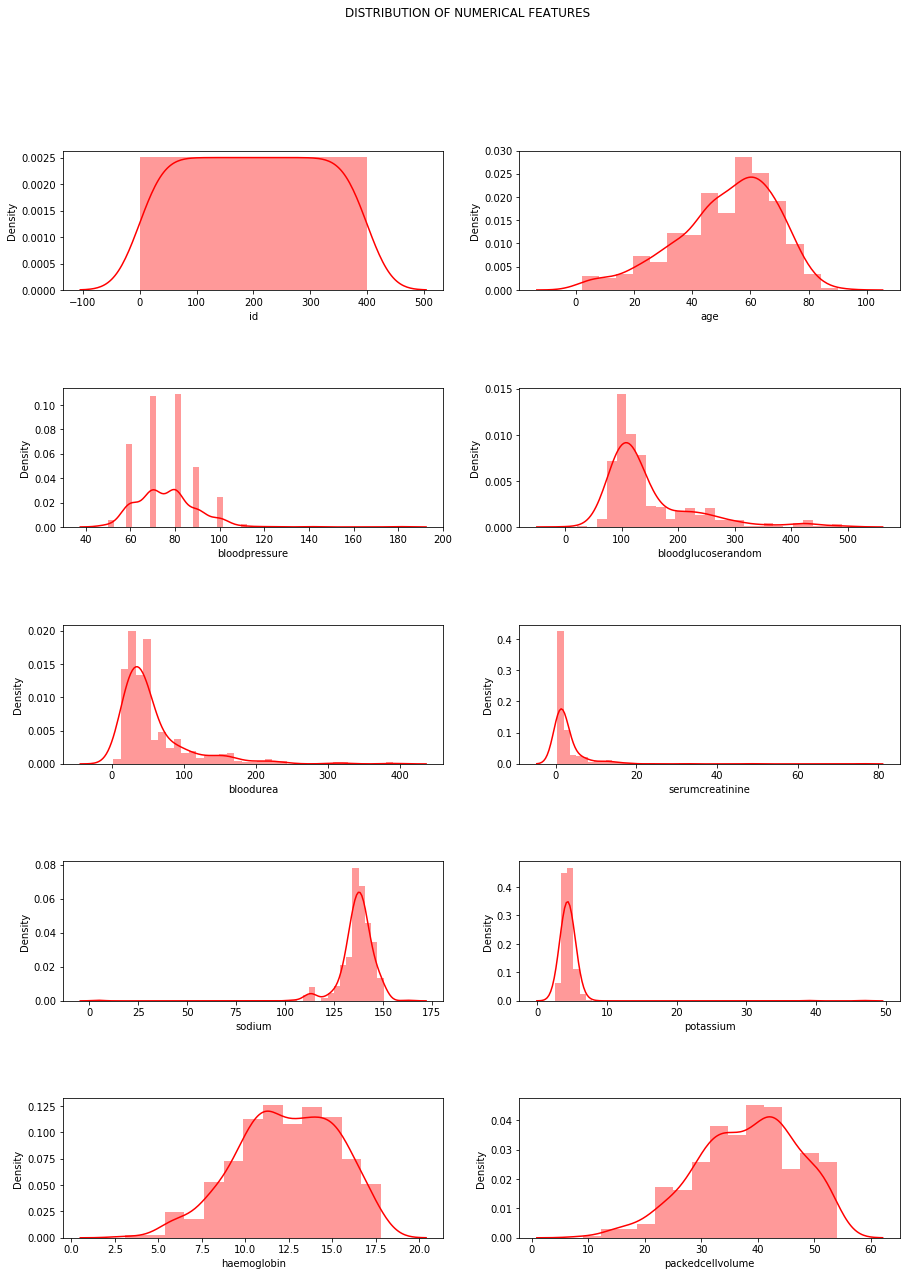

In [64]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,20))
fig.subplots_adjust(hspace=0.7)
fig.suptitle('DISTRIBUTION OF NUMERICAL FEATURES')
for ax, feats in zip(axes.flatten(), numericalFeatures):
    sns.distplot(a=df[feats], ax=ax,color='red')


CONCLUSIONS FROM THE ABOVE PLOTS:


1)age looks a bit left skewed

2)Blood gluscose random is right skewed

3)Blood Urea is also a bit right skewed

DISTRIBUTION OF NUMERICAL FEATURES

/home/aditya1234/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/aditya1234/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/aditya1234/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/a

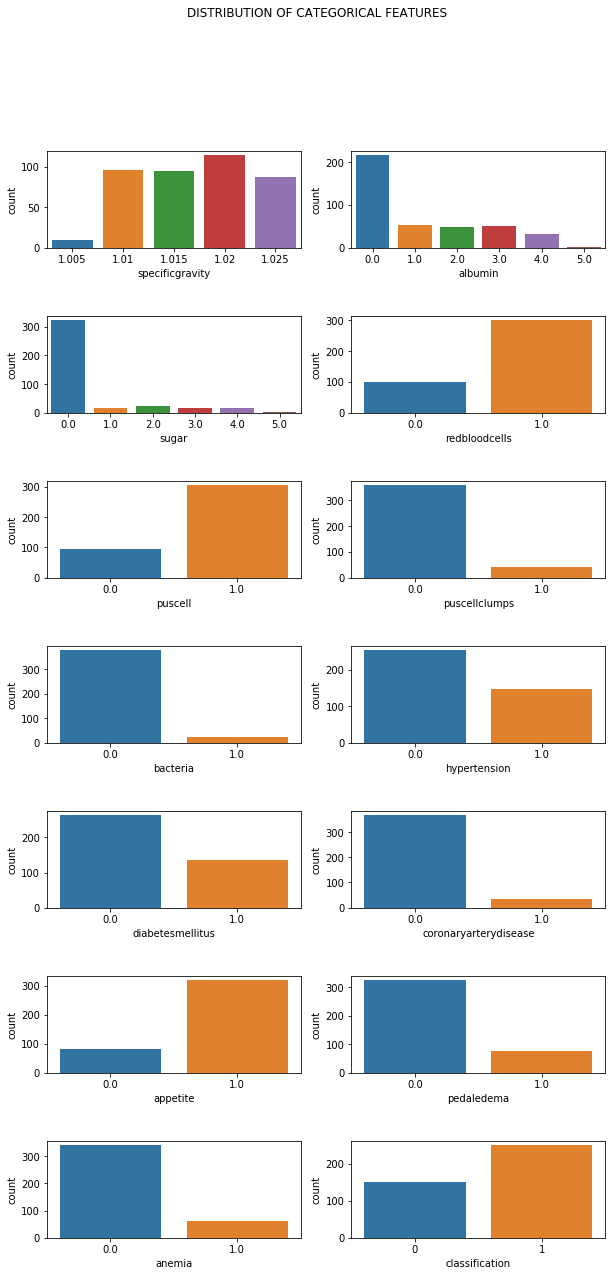

In [65]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
fig.subplots_adjust(hspace=0.7)
fig.suptitle('DISTRIBUTION OF CATEGORICAL FEATURES')
for ax, feats in zip(axes.flatten(), categoricalFeatures):
    sns.countplot(df[feats], ax=ax)

HEATMAP

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.It is used to show the correlation among the data.

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
id,1.000000,-0.192566,-0.251217,0.611089,-0.511674,-0.273331,0.395501,0.406226,-0.264142,-0.115955,...,0.592233,0.066214,0.558981,-0.520089,-0.475106,-0.205575,0.374394,-0.308120,-0.273096,-0.838528
age,-0.192566,1.000000,0.163751,-0.210610,0.133132,0.202630,-0.078760,-0.133763,0.155960,0.041886,...,-0.239922,0.036074,-0.153236,0.400967,0.370296,0.229504,-0.151713,0.093993,0.061160,0.236127
bloodpressure,-0.251217,0.163751,1.000000,-0.173693,0.131935,0.232853,-0.237796,-0.182759,0.061412,0.112154,...,-0.277585,-0.010939,-0.192429,0.278419,0.238125,0.087632,-0.180258,0.077766,0.208749,0.287039
specificgravity,0.611089,-0.210610,-0.173693,1.000000,-0.440037,-0.295896,0.327140,0.357778,-0.259846,-0.198158,...,0.548345,0.144424,0.481177,-0.377839,-0.433161,-0.155848,0.221253,-0.285849,-0.222038,-0.720167
albumin,-0.511674,0.133132,0.131935,-0.440037,1.000000,0.253735,-0.250778,-0.500153,0.355444,0.330071,...,-0.537004,-0.142471,-0.485837,0.513953,0.394725,0.296740,-0.310875,0.437742,0.329052,0.603927
sugar,-0.273331,0.202630,0.232853,-0.295896,0.253735,1.000000,-0.161064,-0.213185,0.124298,0.088473,...,-0.259947,-0.063692,-0.224483,0.308763,0.486089,0.231582,-0.068061,0.137595,0.119672,0.339571
redbloodcells,0.395501,-0.078760,-0.237796,0.327140,-0.250778,-0.161064,1.000000,0.288301,-0.084751,-0.063311,...,0.331285,0.074724,0.302126,-0.206571,-0.240286,-0.155268,0.193069,-0.147170,-0.161690,-0.447214
puscell,0.406226,-0.133763,-0.182759,0.357778,-0.500153,-0.213185,0.288301,1.000000,-0.441247,-0.277657,...,0.439491,0.055281,0.383850,-0.342249,-0.278079,-0.188008,0.255027,-0.343678,-0.259128,-0.432302
puscellclumps,-0.264142,0.155960,0.061412,-0.259846,0.355444,0.124298,-0.084751,-0.441247,1.000000,0.275082,...,-0.267591,-0.067646,-0.248211,0.195623,0.165236,0.188029,-0.189688,0.104356,0.175861,0.265313
bacteria,-0.115955,0.041886,0.112154,-0.198158,0.330071,0.088473,-0.063311,-0.277657,0.275082,1.000000,...,-0.167229,-0.056991,-0.159918,0.089046,0.080070,0.162395,-0.149126,0.134732,0.052208,0.186871


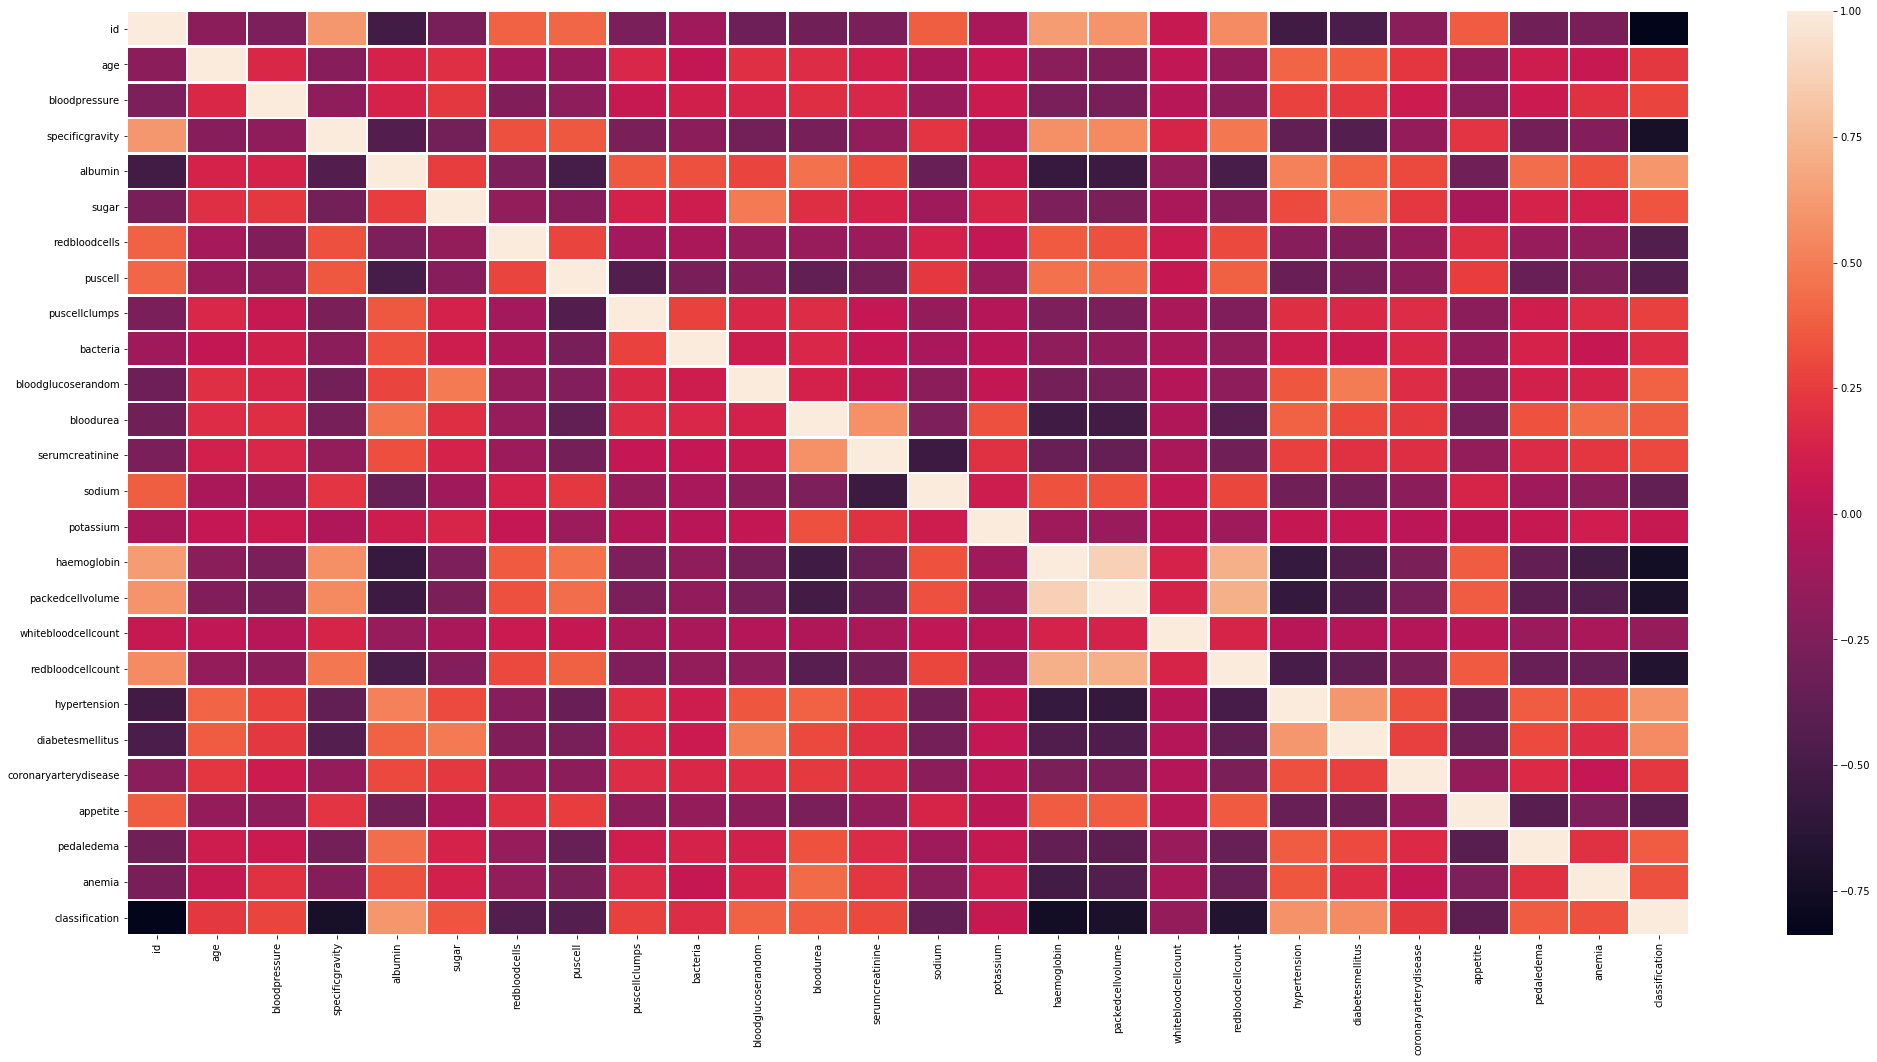

In [66]:
f= plt.subplots(figsize=(35,17))
corr=df.corr()
corr=(corr)
sns.heatmap(corr,
xticklabels= corr.columns.values,linewidth=1.5,
yticklabels=corr.columns.values)
corr

Now Let Us Build our model To Predict CHRONIC KIDNEY DISEASE

Algorithms we are using are

1)Logistic Regression


Let us implement Logistic Regression From Sctratch as well as from sklearn and let us determine their performence


In [239]:
X = df[df.columns[0:25]]
y = df[df.columns[25]]

In [245]:
#Split the data into 70% training and 30% testing 
X_train,  X_test, y_train, y_test = train_test_split( X, y, test_size=1/3,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

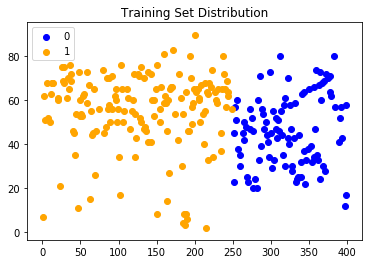

In [246]:
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='1')
plt.title("Training Set Distribution")
plt.legend();

In [247]:
class Logisticregression:
    def __init__(self, lr=0.02, num_iter=10000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
           
                
           
               
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.add_intercept(X)
    
        return self.sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [248]:
model = Logisticregression(lr=0.02, num_iter=10000)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


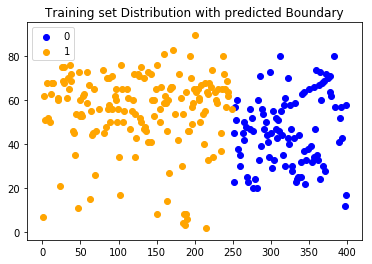

In [249]:
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='1')
plt.title("Training set Distribution with predicted Boundary")
plt.legend();


In [250]:
Y_pred = model.predict(X_test)

In [251]:
cm = confusion_matrix(y_test,Y_pred)
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in cm]))

  49   0
   2  83


In [252]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))

False Positives
 [2 0]
False Negetives
 [0 2]
True Positives
 [49 83]
True Negetives
 [83 49]


In [253]:

TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Acclr = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Acclr))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))

Specificity 
 [0.97647059 1.        ]
Precision 
 [0.96078431 1.        ]
Recall 
 [1.         0.97647059]
Áccuracy 
[0.98507463 0.98507463]
FScore 
[0.98       0.98809524]


0.9850746268656716


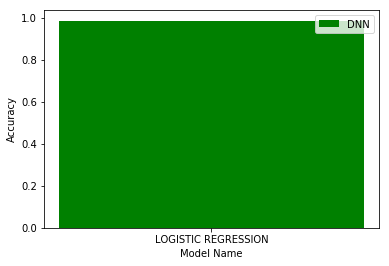

In [254]:
from sklearn.metrics import accuracy_score
lraccc=accuracy_score(y_test,Y_pred)
print(lraccc)

plt.bar(['LOGISTIC REGRESSION'],[lraccc], label="DNN", color='g')

plt.legend()
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.show()

Let us Implement KNN from  Scratch

In [355]:

class KNearestNeighbors() :
    def __init__( self, A ) :
        self.A = A
        
    def fit( self, X_train, Y_train ) : 
        self.X_train = X_train 
        self.Y_train = Y_train
        self.m, self.n = X_train.shape
        
    def euclidean( self, x, x_train ) : 
        return np.sqrt( np.sum( np.square( x - x_train ) ) ) 
    
    def findNeighbors( self, x ) : 
        euclidean_distances = np.zeros( self.m ) 
        for i in range( self.m ) : 
            d = self.euclidean( x, self.X_train[i] ) 
            euclidean_distances[i] = d 
        inds = euclidean_distances.argsort() 
        Y_train_sorted = self.Y_train[inds] 
        return Y_train_sorted[:self.A] 
   
        
    def predict( self, X_test ) : 
        self.X_test = X_test 
        self.m_test, self.n = X_test.shape 
        Y_predict = np.zeros( self.m_test ) 
        for i in range( self.m_test ) : 
            x = self.X_test[i] 
            neighbors = np.zeros( self.A ) 
            neighbors = self.findNeighbors( x ) 
            Y_predict[i] = mode( neighbors )[0][0]	 
        return Y_predict 

    


In [356]:
df1=df
print(df1.shape[1])          
  
df1.columns = range(df1.shape[1])


26


In [357]:
X = df1[df1.columns[0:25]]
y = df1[df1.columns[25]]

In [358]:
X_train, X_test, y_train, y_test =train_test_split( X, y, test_size =1/3 ,random_state=42) 
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [359]:
kmodel = KNearestNeighbors( A = 9 ) 
kmodel.fit( X_train, y_train ) 

In [360]:
Y_pred = kmodel.predict(X_test)

In [361]:
cm = confusion_matrix(y_test,Y_pred)
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in cm]))

  49   0
   3  82


In [362]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))

False Positives
 [3 0]
False Negetives
 [0 3]
True Positives
 [49 82]
True Negetives
 [82 49]


In [363]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Accknn = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Accknn))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))

Specificity 
 [0.96470588 1.        ]
Precision 
 [0.94230769 1.        ]
Recall 
 [1.         0.96470588]
Áccuracy 
[0.97761194 0.97761194]
FScore 
[0.97029703 0.98203593]


0.9776119402985075


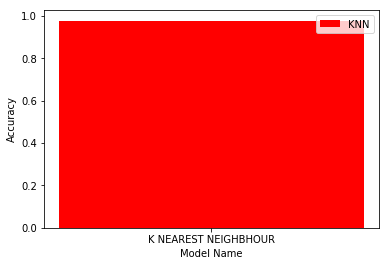

In [364]:
from sklearn.metrics import accuracy_score
knnaccc=accuracy_score(y_test,Y_pred)
print(knnaccc)
from sklearn.metrics import accuracy_score
lraccc=accuracy_score(y_test,Y_pred)

plt.bar(['K NEAREST NEIGHBHOUR'],[knnaccc], label="KNN", color='r')

plt.legend()
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.show()

In [344]:
df2=df
X = df2[df2.columns[0:25]]
y = df2[df2.columns[25]]

In [345]:

X_train,  X_test, y_train, y_test = train_test_split( X, y, test_size=1/3,random_state=42)

In [346]:


Annmodel = Sequential()
Annmodel.add(Dense(256, input_dim=len(X.columns),kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
Annmodel.add(Dense(1, activation="hard_sigmoid"))

In [347]:
Annmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [348]:
#Train the model
history = Annmodel.fit(X_train, y_train, epochs=1000, batch_size=X_train.shape[0]) 

Epoch 1/1000
266/266 [==============================] - 1s 2ms/step - loss: 3.8820 - acc: 0.5902
Epoch 2/1000
266/266 [==============================] - 0s 12us/step - loss: 2.1952 - acc: 0.6654
Epoch 3/1000
266/266 [==============================] - 0s 12us/step - loss: 1.1920 - acc: 0.7744
Epoch 4/1000
266/266 [==============================] - 0s 10us/step - loss: 0.6810 - acc: 0.9023
Epoch 5/1000
266/266 [==============================] - 0s 10us/step - loss: 0.8518 - acc: 0.9060
Epoch 6/1000
266/266 [==============================] - 0s 10us/step - loss: 0.4364 - acc: 0.9436
Epoch 7/1000
266/266 [==============================] - 0s 18us/step - loss: 0.1303 - acc: 0.9624
Epoch 8/1000
266/266 [==============================] - 0s 10us/step - loss: 0.0596 - acc: 0.9699
Epoch 9/1000
266/266 [==============================] - 0s 12us/step - loss: 0.0731 - acc: 0.9699
Epoch 10/1000
266/266 [==============================] - 0s 15us/step - loss: 0.1471 - acc: 0.9549
Epoch 11/1000
266/26

Epoch 84/1000
266/266 [==============================] - 0s 15us/step - loss: 0.0105 - acc: 1.0000
Epoch 85/1000
266/266 [==============================] - 0s 12us/step - loss: 0.0103 - acc: 1.0000
Epoch 86/1000
266/266 [==============================] - 0s 12us/step - loss: 0.0102 - acc: 1.0000
Epoch 87/1000
266/266 [==============================] - 0s 16us/step - loss: 0.0101 - acc: 1.0000
Epoch 88/1000
266/266 [==============================] - 0s 13us/step - loss: 0.0099 - acc: 1.0000
Epoch 89/1000
266/266 [==============================] - 0s 22us/step - loss: 0.0098 - acc: 1.0000
Epoch 90/1000
266/266 [==============================] - 0s 17us/step - loss: 0.0097 - acc: 1.0000
Epoch 91/1000
266/266 [==============================] - 0s 19us/step - loss: 0.0096 - acc: 1.0000
Epoch 92/1000
266/266 [==============================] - 0s 16us/step - loss: 0.0094 - acc: 1.0000
Epoch 93/1000
266/266 [==============================] - 0s 12us/step - loss: 0.0093 - acc: 1.0000
Epoch 94/1

Epoch 167/1000
266/266 [==============================] - 0s 14us/step - loss: 0.0042 - acc: 1.0000
Epoch 168/1000
266/266 [==============================] - 0s 13us/step - loss: 0.0041 - acc: 1.0000
Epoch 169/1000
266/266 [==============================] - 0s 10us/step - loss: 0.0041 - acc: 1.0000
Epoch 170/1000
266/266 [==============================] - 0s 12us/step - loss: 0.0040 - acc: 1.0000
Epoch 171/1000
266/266 [==============================] - 0s 14us/step - loss: 0.0040 - acc: 1.0000
Epoch 172/1000
266/266 [==============================] - 0s 12us/step - loss: 0.0040 - acc: 1.0000
Epoch 173/1000
266/266 [==============================] - 0s 14us/step - loss: 0.0039 - acc: 1.0000
Epoch 174/1000
266/266 [==============================] - 0s 15us/step - loss: 0.0039 - acc: 1.0000
Epoch 175/1000
266/266 [==============================] - 0s 12us/step - loss: 0.0039 - acc: 1.0000
Epoch 176/1000
266/266 [==============================] - 0s 15us/step - loss: 0.0038 - acc: 1.0000


Epoch 249/1000
266/266 [==============================] - 0s 11us/step - loss: 0.0014 - acc: 1.0000
Epoch 250/1000
266/266 [==============================] - 0s 18us/step - loss: 0.0013 - acc: 1.0000
Epoch 251/1000
266/266 [==============================] - 0s 10us/step - loss: 0.0013 - acc: 1.0000
Epoch 252/1000
266/266 [==============================] - 0s 12us/step - loss: 0.0013 - acc: 1.0000
Epoch 253/1000
266/266 [==============================] - 0s 9us/step - loss: 0.0013 - acc: 1.0000
Epoch 254/1000
266/266 [==============================] - 0s 11us/step - loss: 0.0013 - acc: 1.0000
Epoch 255/1000
266/266 [==============================] - 0s 11us/step - loss: 0.0012 - acc: 1.0000
Epoch 256/1000
266/266 [==============================] - 0s 13us/step - loss: 0.0012 - acc: 1.0000
Epoch 257/1000
266/266 [==============================] - 0s 18us/step - loss: 0.0012 - acc: 1.0000
Epoch 258/1000
266/266 [==============================] - 0s 18us/step - loss: 0.0012 - acc: 1.0000
E

Epoch 329/1000
266/266 [==============================] - 0s 10us/step - loss: 2.9199e-04 - acc: 1.0000
Epoch 330/1000
266/266 [==============================] - 0s 11us/step - loss: 3.5043e-04 - acc: 1.0000
Epoch 331/1000
266/266 [==============================] - 0s 10us/step - loss: 2.9632e-04 - acc: 1.0000
Epoch 332/1000
266/266 [==============================] - 0s 11us/step - loss: 2.5251e-04 - acc: 1.0000
Epoch 333/1000
266/266 [==============================] - 0s 27us/step - loss: 2.7568e-04 - acc: 1.0000
Epoch 334/1000
266/266 [==============================] - 0s 13us/step - loss: 2.3888e-04 - acc: 1.0000
Epoch 335/1000
266/266 [==============================] - 0s 11us/step - loss: 2.6647e-04 - acc: 1.0000
Epoch 336/1000
266/266 [==============================] - 0s 15us/step - loss: 2.8550e-04 - acc: 1.0000
Epoch 337/1000
266/266 [==============================] - 0s 12us/step - loss: 2.1959e-04 - acc: 1.0000
Epoch 338/1000
266/266 [==============================] - 0s 14u

Epoch 408/1000
266/266 [==============================] - 0s 15us/step - loss: 1.9397e-05 - acc: 1.0000
Epoch 409/1000
266/266 [==============================] - 0s 16us/step - loss: 3.3308e-05 - acc: 1.0000
Epoch 410/1000
266/266 [==============================] - 0s 21us/step - loss: 3.4567e-05 - acc: 1.0000
Epoch 411/1000
266/266 [==============================] - 0s 18us/step - loss: 2.1313e-04 - acc: 1.0000
Epoch 412/1000
266/266 [==============================] - 0s 23us/step - loss: 1.3168e-05 - acc: 1.0000
Epoch 413/1000
266/266 [==============================] - 0s 11us/step - loss: 7.5300e-05 - acc: 1.0000
Epoch 414/1000
266/266 [==============================] - 0s 15us/step - loss: 3.1710e-05 - acc: 1.0000
Epoch 415/1000
266/266 [==============================] - 0s 13us/step - loss: 1.7328e-06 - acc: 1.0000
Epoch 416/1000
266/266 [==============================] - 0s 15us/step - loss: 4.5317e-05 - acc: 1.0000
Epoch 417/1000
266/266 [==============================] - 0s 15u

Epoch 487/1000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 488/1000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 489/1000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 490/1000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 491/1000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 492/1000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 493/1000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 494/1000
266/266 [==============================] - 0s 9us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 495/1000
266/266 [==============================] - 0s 9us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 496/1000
266/266 [==============================] - 0s 24us/

Epoch 566/1000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 567/1000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 568/1000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 569/1000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 570/1000
266/266 [==============================] - 0s 10us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 571/1000
266/266 [==============================] - 0s 10us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 572/1000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 573/1000
266/266 [==============================] - 0s 29us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 574/1000
266/266 [==============================] - 0s 17us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 575/1000
266/266 [==============================] - 0s 21u

Epoch 645/1000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 646/1000
266/266 [==============================] - 0s 18us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 647/1000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 648/1000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 649/1000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 650/1000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 651/1000
266/266 [==============================] - 0s 17us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 652/1000
266/266 [==============================] - 0s 9us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 653/1000
266/266 [==============================] - 0s 23us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 654/1000
266/266 [==============================] - 0s 17us

Epoch 724/1000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 725/1000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 726/1000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 727/1000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 728/1000
266/266 [==============================] - 0s 10us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 729/1000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 730/1000
266/266 [==============================] - 0s 10us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 731/1000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 732/1000
266/266 [==============================] - 0s 15us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 733/1000
266/266 [==============================] - 0s 15u

Epoch 803/1000
266/266 [==============================] - 0s 18us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 804/1000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 805/1000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 806/1000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 807/1000
266/266 [==============================] - 0s 14us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 808/1000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 809/1000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 810/1000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 811/1000
266/266 [==============================] - 0s 22us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 812/1000
266/266 [==============================] - 0s 12u

Epoch 882/1000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 883/1000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 884/1000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 885/1000
266/266 [==============================] - 0s 21us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 886/1000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 887/1000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 888/1000
266/266 [==============================] - 0s 17us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 889/1000
266/266 [==============================] - 0s 11us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 890/1000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 891/1000
266/266 [==============================] - 0s 18u

Epoch 961/1000
266/266 [==============================] - 0s 18us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 962/1000
266/266 [==============================] - 0s 13us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 963/1000
266/266 [==============================] - 0s 20us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 964/1000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 965/1000
266/266 [==============================] - 0s 10us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 966/1000
266/266 [==============================] - 0s 12us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 967/1000
266/266 [==============================] - 0s 10us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 968/1000
266/266 [==============================] - 0s 16us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 969/1000
266/266 [==============================] - 0s 27us/step - loss: 1.1192e-07 - acc: 1.0000
Epoch 970/1000
266/266 [==============================] - 0s 25u

In [349]:

for model_file in glob.glob("*.model"):

    model = load_model(model_file)
    y_pred = Annmodel.predict(X_test)
    y_pred = [1 if y>=0.5 else 0 for y in y_pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5


In [350]:
cm = confusion_matrix(y_test,y_pred)
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in cm]))

  49   0
   0  85


In [351]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))

False Positives
 [0 0]
False Negetives
 [0 0]
True Positives
 [49 85]
True Negetives
 [85 49]


In [352]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Accann = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Accann))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))

Specificity 
 [1. 1.]
Precision 
 [1. 1.]
Recall 
 [1. 1.]
Áccuracy 
[1. 1.]
FScore 
[1. 1.]


1.0


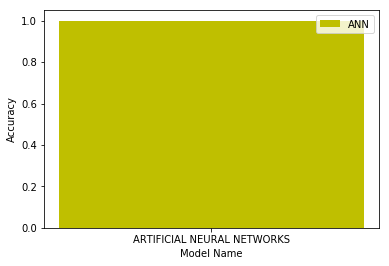

In [353]:

from sklearn.metrics import accuracy_score
Accann=accuracy_score(y_test,y_pred)
print(Accann)
plt.bar(['ARTIFICIAL NEURAL NETWORKS'],[Accann], label="ANN", color='y')

plt.legend()
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.show()

1.0


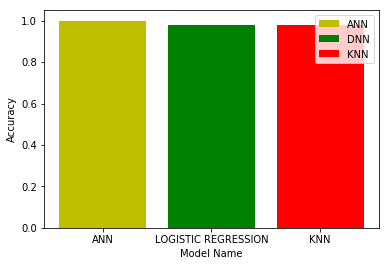

In [366]:

from sklearn.metrics import accuracy_score
Accann=accuracy_score(y_test,y_pred)
print(Accann)
plt.bar(['ANN'],[Accann], label="ANN", color='y')
plt.bar(['LOGISTIC REGRESSION'],[lraccc], label="DNN", color='g')
plt.bar(['KNN'],[knnaccc], label="KNN", color='r')

plt.legend()
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.show()